In [20]:
import pandas as pd
from PIL import Image
import numpy as np

raw = pd.read_excel (r'./data/Book4.xlsx')
df = pd.DataFrame(raw, columns= ['TR20_01', 'TI20_01'])
df = df.iloc[1:]

In [7]:
import modules.rEYEkerAnalysis as rEYEker

(_data, _times, click_setting) = rEYEker.load_data_from_json("data/example.json")

In [8]:
image_rec = rEYEker.load_image("images/TR_Fibonacci.png")
image_iter = rEYEker.load_image("images/TI_Fibonacci.png")

In [9]:
click_data_rec = []
for _idx, item in df.iterrows():
    data_str = item[0]
    data_str = data_str.strip()
    coordinates_str = data_str.split(" ")
    coordinates = []
    for coordinate_str in coordinates_str:
        coordinate = coordinate_str.split("-")
        coordinate = (int(coordinate[0]), int(coordinate[1]))
        coordinates.append(coordinate)
    click_data_rec.append(coordinates)
    
click_data_iter = []
for _idx, item in df.iterrows():
    data_str = item[1]
    data_str = data_str.strip()
    coordinates_str = data_str.split(" ")
    coordinates = []
    for coordinate_str in coordinates_str:
        coordinate = coordinate_str.split("-")
        coordinate = (int(coordinate[0]), int(coordinate[1]))
        coordinates.append(coordinate)
    click_data_iter.append(coordinates)

In [10]:
def save_images(ims, prefix, extension):
    for idx, data in enumerate(ims):
        data = data*255
        data = np.uint8(data)
        im = Image.fromarray(data)
        im.save(prefix + str(idx) + extension)

In [11]:
ims_lines_rec = []
for data in click_data_rec:
    im = rEYEker.draw_vertical_line_diagram(image_rec, data, should_copy=True)
    ims_lines_rec.append(im)
    
ims_lines_iter = []
for data in click_data_iter:
    im = rEYEker.draw_vertical_line_diagram(image_iter, data, should_copy=True)
    ims_lines_iter.append(im)
    

In [19]:
save_images(ims_lines_rec, "./results/lines/TR20_01_", ".png")
save_images(ims_lines_iter, "./results/lines/TI20_01_", ".png")

In [23]:
im_rec = rEYEker.draw_average_shape_heat_map_rel(image_rec, click_data_rec, click_setting, 1.0, .8, should_copy=True)
im_iter = rEYEker.draw_average_shape_heat_map_rel(image_iter, click_data_iter, click_setting, 1.0, .8, should_copy=True)
rEYEker.display(im_rec, normal_size=False)
rEYEker.display(im_iter, normal_size=False)

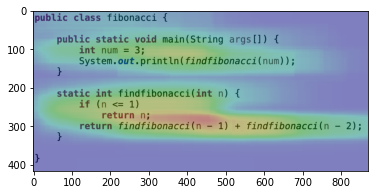

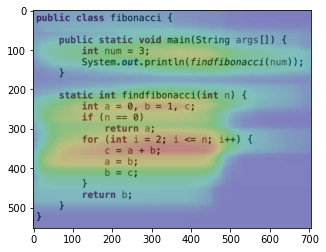

In [14]:
im_rec_100 = rEYEker.draw_average_shape_heat_map_rel(image_rec, click_data_rec, click_setting, 1.0, .0, should_copy=True)
im_iter_100 = rEYEker.draw_average_shape_heat_map_rel(image_iter, click_data_iter, click_setting, 1.0, .0, should_copy=True)
rEYEker.display(im_rec_100, normal_size=False)
rEYEker.display(im_iter_100, normal_size=False)

In [24]:
ims_iter = [im_iter_100, im_iter]
ims_rec = [im_rec_100, im_rec]
save_images(ims_rec, "./results/average_heat/Fib_Rec_", ".png")
save_images(ims_iter, "./results/average_heat/Fib_Iter_", ".png")

FileNotFoundError: [Errno 2] No such file or directory: './results/average_heat/Fib_Rec_0.png'

In [17]:
i = 0
for dataset in click_data_rec:
    i = i + len(dataset)
i = i / len(click_data_rec) 
print(i)

38.607142857142854


In [18]:
i = 0
for dataset in click_data_iter:
    i = i + len(dataset)
i = i / len(click_data_rec) 
print(i)

51.17857142857143


<h3>How to analyze</h3>

Mental models, how to they work

"data of measured visual stimulus"

visualize avergae respone time, correctnes, etc

1. visualize heatmaps per snippet 

2. visualize general heatmap

3. generate sequence diagramm

4. generate code flow diagramm

5. compare sequence and code flow maybe with needleman wunsch

[6. compare iterative vs recursive reading order in apsect of transition order] spüecial to this study...

7. seperate sample into correct and incorrect (correctness, responsetime, etc.), [bottom-up vs top-down maybe, how do they appear in the different samples, are they comparable]

8. anaylze averaged of theese (time, visual simulus measurements), how do they differ between the sets

9. generl poiunts of interest of the algorithm or "hard" parts, how often do people look into this, how dothey jump to it, when do they jump to it




x. stress measurement

y. how long at one place



In [50]:
import numpy as np

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


NameError: name 't' is not defined

In [93]:
x_axis = 6;
y_axis = 3;


def calcer(x, y):
    if x%2==0:
        return int(x/2)
    return y

a = np.array([[calcer(x,y) for x in range (0, x_axis*2)] for y in range(0, y_axis)])
x_coords = a[:, 0:x_axis:2]
y_coords = a[1:y_axis, :]
print(x_coords)
print(y_coords)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 1 1 1 2 1 3 1 4 1 5 1]
 [0 2 1 2 2 2 3 2 4 2 5 2]]
